# Marathons From CSV: Part II

## This notebook contains analysis of the Nashville Rock N Roll Marathons from 2016-19.

## This notebook uses CSV files that were scraped in another notebook.

In [1]:
#Importing Packages

import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

# Importing CSV files

In [3]:
full_2016_df = pd.read_csv('data/full_2016.csv')

In [4]:
full_2017_df = pd.read_csv('data/full_2017.csv')

In [5]:
full_2018_df = pd.read_csv('data/full_2018.csv')

In [6]:
full_2019_df = pd.read_csv('data/full_2019.csv')

In [7]:
half_2016_df = pd.read_csv('data/half_2016.csv')

In [8]:
half_2017_df = pd.read_csv('data/half_2017.csv')

In [9]:
half_2018_df = pd.read_csv('data/half_2018.csv')

In [10]:
half_2019_df = pd.read_csv('data/half_2019.csv')

# Getting year column into DFs

In [11]:
full_2016_df['Year'] = 2016
full_2017_df['Year'] = 2017
full_2018_df['Year'] = 2018
full_2019_df['Year'] = 2019
half_2016_df['Year'] = 2016
half_2017_df['Year'] = 2017
half_2018_df['Year'] = 2018
half_2019_df['Year'] = 2019

In [12]:
#Bib_Things function: creating all variables

def bib_things(df):
        #eliminate all zero finish times
    df = df[df.Time != '00:00:00' ]
        # eliminate all '99999' for 'Overall'
    df = df[df.Overall != 99999 ]
        # create TimeDelta variable
    df['TimeDelta'] = pd.to_timedelta(df['Time'])
        # create hours variable
    df['Hours'] = df.Time.str[0:2].astype(float)
        # create minutes variable
    df['Minutes'] = df.Time.str[3:5].astype(float)
        #create seconds variable
    df['Seconds'] = df.Time.str[6:8].astype(float)
        # create Number Of Minutes variable
    df['Number_Of_Minutes'] = ((df.Hours * 60)) + ((df.Minutes)) + ((df.Seconds)/(60))
        # create Bib String variable
    df['Bib_String'] = df.Bib.astype(str)
        #create Bib Length variable
    df['Bib_Length'] = df.Bib_String.str.len()
        #drop duplicates 
    df = df.drop_duplicates()
    return df

In [13]:
#Running function on all dataframes

full_2016_df = bib_things(full_2016_df)
full_2017_df = bib_things(full_2017_df)
full_2018_df = bib_things(full_2018_df)
full_2019_df = bib_things(full_2019_df)
half_2016_df = bib_things(half_2016_df)
half_2017_df = bib_things(half_2017_df)
half_2018_df = bib_things(half_2018_df)
half_2019_df = bib_things(half_2019_df)

In [14]:
all_full_df = pd.concat([full_2016_df, full_2017_df, full_2018_df, full_2019_df], axis=0)

In [15]:
all_half_df = pd.concat([half_2016_df, half_2017_df, half_2018_df, half_2019_df], axis=0)

In [16]:
# Getting rid of erroneous datapoint

all_full_df =  all_full_df[all_full_df.Number_Of_Minutes > 120 ]

In [17]:
all_full_df.sort_values(by=['Number_Of_Minutes'])

,Overall,Bib,Name,Time,Year,TimeDelta,Hours,Minutes,Seconds,Number_Of_Minutes,Bib_String,Bib_Length
0,1,1,Scott Wietecha,02:25:42,2016,02:25:42,2.0,25.0,42.0,145.700000,1,1
0,1,1,Scott Wietecha,02:28:16,2018,02:28:16,2.0,28.0,16.0,148.266667,1,1
1,2,3,Garang Madut,02:29:52,2018,02:29:52,2.0,29.0,52.0,149.866667,3,1
1,2,3,Brian Shelton,02:34:43,2016,02:34:43,2.0,34.0,43.0,154.716667,3,1
1,2,1,Scott Wietecha,02:34:59,2019,02:34:59,2.0,34.0,59.0,154.983333,1,1
2,3,4,Jordan Wilson,02:35:24,2019,02:35:24,2.0,35.0,24.0,155.400000,4,1
2,3,1047,Christopher Capps,02:38:43,2016,02:38:43,2.0,38.0,43.0,158.716667,1047,4
2,3,33442,Kevin Fink,02:38:59,2018,02:38:59,2.0,38.0,59.0,158.983333,33442,5
3,4,30034,Steelton Flynn,02:39:59,2019,02:39:59,2.0,39.0,59.0,159.983333,30034,5
0,1,1,Scott Wietecha,02:40:25,2017,02:40:25,2.0,40.0,25.0,160.416667,1,1


In [18]:
all_full_df.head()

,Overall,Bib,Name,Time,Year,TimeDelta,Hours,Minutes,Seconds,Number_Of_Minutes,Bib_String,Bib_Length
0,1,1,Scott Wietecha,02:25:42,2016,02:25:42,2.0,25.0,42.0,145.700000,1,1
1,2,3,Brian Shelton,02:34:43,2016,02:34:43,2.0,34.0,43.0,154.716667,3,1
2,3,1047,Christopher Capps,02:38:43,2016,02:38:43,2.0,38.0,43.0,158.716667,1047,4
3,4,1052,Jason Grimes,02:45:06,2016,02:45:06,2.0,45.0,6.0,165.100000,1052,4
4,5,1046,David Adams,02:47:28,2016,02:47:28,2.0,47.0,28.0,167.466667,1046,4


# This is the end of prepping dataframes- from here I'll create the graphics to present. 

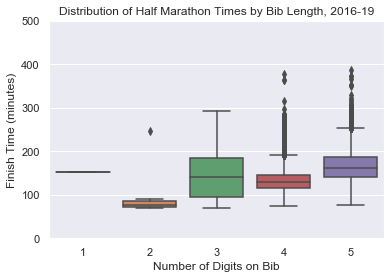

In [47]:
half_boxplot = sns.boxplot(y=all_half_df.Number_Of_Minutes, x = all_half_df.Bib_Length)
plt.title('Distribution of Half Marathon Times by Bib Length, 2016-19')
plt.ylim(0, 500)
plt.xlabel('Number of Digits on Bib')
plt.ylabel('Finish Time (minutes)');
#plt.savefig('half_boxplot.png', bbox_inches='tight')

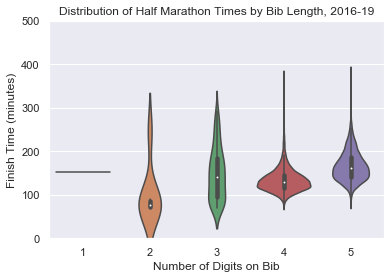

In [46]:
half_violinplot = sns.violinplot(y=all_half_df.Number_Of_Minutes, x = all_half_df.Bib_Length)
plt.title('Distribution of Half Marathon Times by Bib Length, 2016-19')
plt.ylim(0, 500)
plt.xlabel('Number of Digits on Bib')
plt.ylabel('Finish Time (minutes)');

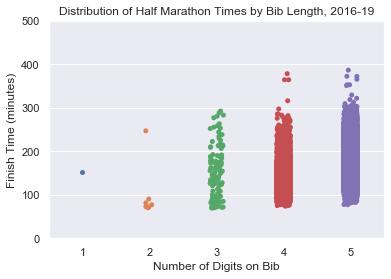

In [60]:
half_stripplot = sns.stripplot(y=all_half_df.Number_Of_Minutes, x = all_half_df.Bib_Length)
plt.title('Distribution of Half Marathon Times by Bib Length, 2016-19')
plt.ylim(0, 500)
plt.xlabel('Number of Digits on Bib')
plt.ylabel('Finish Time (minutes)');

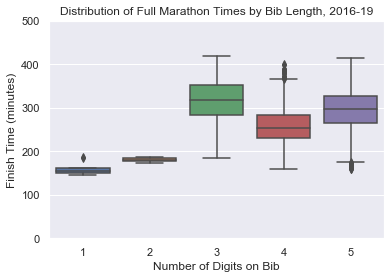

In [45]:
full_boxplot = sns.boxplot(y=all_full_df.Number_Of_Minutes, x = all_full_df.Bib_Length)
plt.title('Distribution of Full Marathon Times by Bib Length, 2016-19')
plt.ylim(0, 500)
plt.xlabel('Number of Digits on Bib')
plt.ylabel('Finish Time (minutes)');
#plt.savefig('full_boxplot.png', bbox_inches='tight')

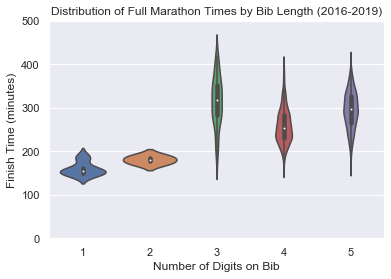

In [44]:
full_violinplot = sns.violinplot(y=all_full_df.Number_Of_Minutes, x = all_full_df.Bib_Length, )
plt.title('Distribution of Full Marathon Times by Bib Length (2016-2019)')
plt.ylim(0, 500)
plt.xlabel('Number of Digits on Bib')
plt.ylabel('Finish Time (minutes)');
#plt.savefig('full_boxplot.png', bbox_inches='tight')

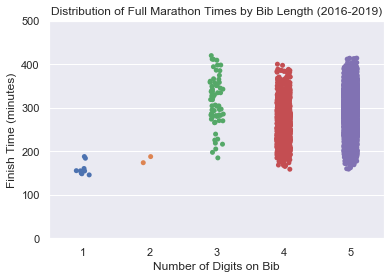

In [62]:
full_stripplot = sns.stripplot(y=all_full_df.Number_Of_Minutes, x = all_full_df.Bib_Length, )
plt.title('Distribution of Full Marathon Times by Bib Length (2016-2019)')
plt.ylim(0, 500)
plt.xlabel('Number of Digits on Bib')
plt.ylabel('Finish Time (minutes)');
#plt.savefig('full_boxplot.png', bbox_inches='tight')

In [31]:
all_full_bibcounts = all_full_df.Bib_Length.value_counts()
print(all_full_bibcounts)

5    7634
4    1839
3      65
1       9
2       2
Name: Bib_Length, dtype: int64


In [32]:
all_half_bibcounts = all_half_df.Bib_Length.value_counts()
print(all_half_bibcounts)

5    42066
4    22071
3      117
2        7
1        1
Name: Bib_Length, dtype: int64


In [33]:
all_full_bibcounts_df = all_full_bibcounts.to_frame()

In [34]:
all_half_bibcounts_df = all_half_bibcounts.to_frame()

In [35]:
all_half_bibcounts_df.head()

,Bib_Length
5,42066
4,22071
3,117
2,7
1,1


In [36]:
all_full_bibcounts_df =all_full_bibcounts_df.sort_index()

In [37]:
all_half_bibcounts_df =all_half_bibcounts_df.sort_index()

In [38]:
9 +2 + 65 + 1839 + 7633


9548

In [39]:
1+7+117+22071+42066

64262

In [40]:
all_full_bibcounts_df['Percentage'] = (all_full_bibcounts_df.Bib_Length)/9548

In [41]:
all_half_bibcounts_df['Percentage'] = (all_half_bibcounts_df.Bib_Length)/64262

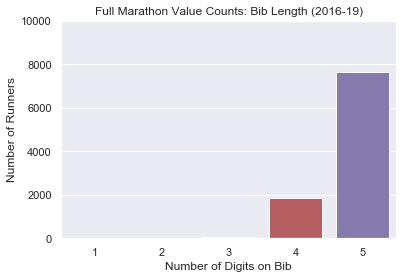

In [48]:
sns.set(style="darkgrid")

ax = sns.countplot(x=all_full_df.Bib_Length)
plt.title('Full Marathon Value Counts: Bib Length (2016-19)')
plt.ylim(0, 10000)
plt.xlabel('Number of Digits on Bib')
plt.ylabel('Number of Runners');
#plt.savefig('full_countplot.png', bbox_inches='tight')

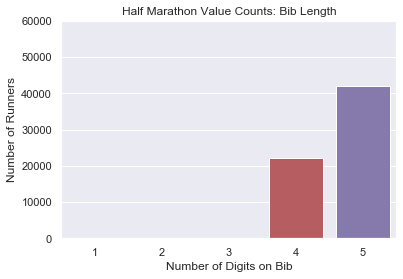

In [52]:


ax2 = sns.countplot(x=all_half_df.Bib_Length)
plt.title('Half Marathon Value Counts: Bib Length')
plt.ylim(0, 60000)
plt.xlabel('Number of Digits on Bib')
plt.ylabel('Number of Runners');
#plt.savefig('half_countplot1.png', bbox_inches='tight')

In [54]:
all_full_bibcounts_df.head()

,Bib_Length,Percentage
1,9,0.000943
2,2,0.000209
3,65,0.006808
4,1839,0.192606
5,7634,0.799539


In [55]:
all_half_bibcounts_df.head()

,Bib_Length,Percentage
1,1,0.000016
2,7,0.000109
3,117,0.001821
4,22071,0.343453
5,42066,0.654601


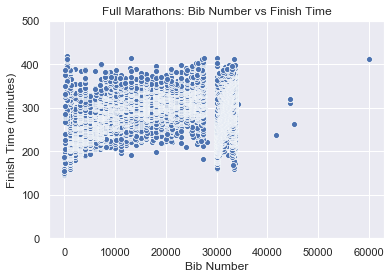

In [87]:
ax = sns.scatterplot(x= all_full_df.Bib, y=all_full_df.Number_Of_Minutes)
plt.title('Full Marathons: Bib Number vs Finish Time')
plt.ylim(0, 500)
plt.xlabel('Bib Number')
plt.ylabel('Finish Time (minutes)');
#plt.savefig('fullscatter.png', bbox_inches='tight')

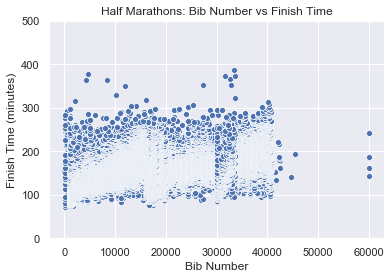

In [85]:
ax = sns.scatterplot(x= all_half_df.Bib, y=all_half_df.Number_Of_Minutes)
plt.ylim(0, 500)
plt.xlabel('Bib Number')
plt.ylabel('Finish Time (minutes)')
plt.title('Half Marathons: Bib Number vs Finish Time');
plt.savefig('halfscatter.png', bbox_inches='tight')

In [58]:
X = all_half_df["Bib_Length"] ## X usually means our input variables (or independent variables)
y = all_half_df["Number_Of_Minutes"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

C:\Users\dingw\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Number_Of_Minutes   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                 1.529e+04
Date:                Sat, 11 Jan 2020   Prob (F-statistic):               0.00
Time:                        13:06:54   Log-Likelihood:            -3.1254e+05
No. Observations:               64262   AIC:                         6.251e+05
Df Residuals:                   64260   BIC:                         6.251e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4055      1.202      6.160      0.000       5.049       9.762
Bib_Length    31.7879      0.257    123.669      0.000      31.284      32.292
==============================================================================
Omnibus:                     7458.317   Durbin-Watson:                   0.316
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11588.596
Skew:                           0.842   Prob(JB):                         0.00
Kurtosis:                       4.221   Cond. No.                         47.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
full_2018_df.Bib_Length.describe()

count    2107.000000
mean        4.979117
std         0.227586
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: Bib_Length, dtype: float64

In [ ]:
# if I reset index on the runner value counts, then I'll be able to use strip plots and violin plots



In [66]:
all_full_bibcounts_df = all_full_bibcounts_df.reset_index()

In [67]:
all_half_bibcounts_df = all_half_bibcounts_df.reset_index()

In [68]:
all_full_bibcounts_df.head()

,index,Bib_Length,Percentage
0,1,9,0.000943
1,2,2,0.000209
2,3,65,0.006808
3,4,1839,0.192606
4,5,7634,0.799539


# This is the end of this notebook.